# Final project - Kaggle competition

In [1]:
# Load packages
import pandas as pd
import numpy as np
import string
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.metrics import accuracy_score

### Load the data

In [2]:
data_dir='/Users/marie-camilleachard/Documents/5. SPRING/2. STAT 154/Final project/'

In [3]:
raw=data_dir+ 'MaskedDataRaw.csv'

In [5]:
ID=[]
Sentiment=[]
SentimentSource=[]
tweets=[]
with open(raw, 'r') as f:
    for line in f:
        sep = ","
        line=line.strip().split(sep)
        ID.append(line[0])
        Sentiment.append(line[1])
        SentimentSource.append(line[2])
        tweets.append(sep.join( line[3:] ))

In [6]:
columns = [ID[0], Sentiment[0], SentimentSource[0], tweets[0]]
size=len(tweets)
index = np.arange(size)

In [7]:
df = pd.DataFrame(columns=columns, index = index)
df[ID[0]]=pd.Series(ID[1:], index=index)
df[Sentiment[0]]=pd.Series(Sentiment[1:], index=index).convert_objects(convert_numeric=True)
df[SentimentSource[0]]=pd.Series(SentimentSource[1:], index=index)
df[tweets[0]]=pd.Series(tweets[1:], index=index)

In [21]:
print df.shape
df.head()

(1578627, 4)


,﻿ItemID,Sentiment,SentimentSource,SentimentText
0,510499,-1,Sentiment140,"""@TheFullClip You are no longer one of &quot;u..."
1,612133,-1,Sentiment140,At a wedding and i dont see the food yet
2,763077,-1,Sentiment140,going to Wisconsin Dells today!!
3,505308,-1,Sentiment140,@TraumaAddict Hrmpf...I'm in the same laundry...
4,163519,-1,Sentiment140,@FrankieTheSats good to hear it! excited alrea...


### OPTIONAL - Transformation of the text of the tweets

In [11]:
tweets[:5]

['SentimentText',
 '"@TheFullClip You are no longer one of &quot;us&quot; anymore.   I keed.  Keep hustlin, homie. no J.O.S.E."',
 'At a wedding and i dont see the food yet',
 'going to Wisconsin Dells today!!',
 "@TraumaAddict  Hrmpf...I'm in the same laundry boat"]

In [9]:
def suppr_punctuation(s):
    s_wo = s.translate(string.maketrans("",""), string.punctuation)
    return s_wo
df['SentimentText']=df['SentimentText'].apply(suppr_punctuation)

In [11]:
df['SentimentText'].head()

0    TheFullClip You are no longer one of quotusquo...
1             At a wedding and i dont see the food yet
2                       going to Wisconsin Dells today
3       TraumaAddict  HrmpfIm in the same laundry boat
4    FrankieTheSats good to hear it excited already...
Name: SentimentText, dtype: object

### Train and test sets

In [12]:
index = df['Sentiment']==-1

In [13]:
test=df[index]
test.shape

(50000, 4)

In [20]:
train=df[-index]
train.shape

(1528627, 4)

#### Counts matrices

In [15]:
vectorizer = CountVectorizer(stop_words="english")

In [16]:
train_counts = vectorizer.fit_transform(train.SentimentText.values)
train_counts.shape

(1528627, 670688)

In [17]:
test_counts = vectorizer.transform(test.SentimentText.values)
test_counts.shape

(50000, 670688)

In [18]:
train_y=train.Sentiment

In [19]:
test_y=test.Sentiment

#### OPTIONAL - Subsets train set for first analysis

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train.SentimentText,train.Sentiment, test_size=0.1, random_state=17)

In [ ]:
counts = vectorizer.fit_transform(X_train)
counts_subset = vectorizer.transform(X_test)

# Multinomial NB

In [26]:
# Create the classifier
classifier = MultinomialNB(fit_prior="False")

In [76]:
# Train the classifier
classifier.fit(counts, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior='False')

In [77]:
# Test the classifier
predictions = classifier.predict(counts_subset) 
test_set_pred = pd.Series(predictions)

In [79]:
 def draw_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized
    plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion matrix")

    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print cm

[[60615 15979]
 [19558 56711]]


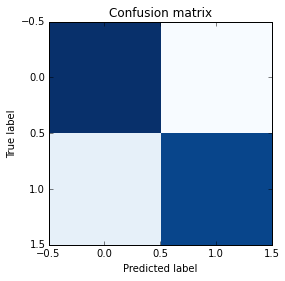

In [80]:
draw_confusion_matrix(y_test, test_set_pred)

In [81]:
print accuracy_score(y_test, test_set_pred)

0.767523861235


# Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf_LG = LogisticRegression()
clf_LG.fit(counts, y_train)
y_pred_LG = clf_LG.predict(counts_subset)
accuracy_score(y_test, y_pred_LG)

KeyboardInterrupt: 

## Logit - entire dataset

In [34]:
real_clf_LG = LogisticRegression()
real_clf_LG.fit(train_counts, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [35]:
real_y_pred_LG = real_clf_LG.predict(test_counts)

In [38]:
# for Kaggle submissions
import csv
def write_csv(fileout, y_pred):
    output_fp = open(fileout, 'wb')
    output = csv.writer(output_fp)
    output.writerow(('id', 'y'))
    for i in range(len(y_pred)):
        output.writerow((i+1, y_pred[i]))

In [39]:
write_csv('LogReg.csv', real_y_pred_LG)